In [40]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
#  导入 3D 绘图工具包 
# (必须导入，否则 Matplotlib 不知道如何处理 '3d' 投影)
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import multivariate_normal

# Programming Sheet 1: Bayes Decision Theory (40 P)

In this exercise sheet, we will apply Bayes decision theory in the context of small two-dimensional problems. For this, we will make use of 3D plotting. We introduce below the basics for constructing these plots in Python/Matplotlib.

### The function `numpy.meshgrid`

To plot two-dimensional functions, we first need to discretize the two-dimensional input space. One basic function for this purpose is `numpy.meshgrid`. The following code creates a discrete grid of the rectangular surface $[0,4] \times [0,3]$. The function `numpy.meshgrid` takes the discretized intervals as input, and returns two arrays of size corresponding to the discretized surface (i.e. the grid) and containing the X and Y-coordinates respectively.

In [6]:
import numpy as np
X,Y = np.meshgrid([0,1,2,3,4],[0,1,2,3])
print(X)
print(Y)
print(list(zip(X.flatten(),Y.flatten())))

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


In [10]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([10, 20])
# 这就是“画棋盘”的核心步骤
# (注意：默认 indexing='xy'，下面会解释)
XX, YY = np.meshgrid(x, y)
print(XX)
print(YY)
print(list(zip(XX.flatten(),YY.flatten())))

[[0 1 2]
 [0 1 2]]
[[10 10 10]
 [20 20 20]]
[(0, 10), (1, 10), (2, 10), (0, 20), (1, 20), (2, 20)]


Note that we can iterate over the elements of the grid by zipping the two arrays `X` and `Y` containing each coordinate. The function `numpy.flatten` converts the 2D arrays to one-dimensional arrays, that can then be iterated element-wise.

### 3D-Plotting

To enable 3D-plotting, we first need to load some modules in addition to `matplotlib`:

In [5]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

As an example, we would like to plot the L2-norm function $f(x,y) = \sqrt{x^2 + y^2}$ on the subspace $x,y \in [-4,4]$. First, we create a meshgrid with appropriate size:

In [6]:
R = np.arange(-4,4+1e-9,0.1) 
# 为了确保 4 这个值能够被包含在生成的数列中。
X,Y = np.meshgrid(R,R)
print(X.shape,Y.shape)
print(X.flatten())

(81, 81) (81, 81)
[-4.  -3.9 -3.8 ...  3.8  3.9  4. ]


Here, we have used a discretization with small increments of 0.1 in order to produce a plot with better resolution. The resulting meshgrid has size (81x81), that is, approximately 6400 points. The function $f$ needs to be evaluated at each of these points. This is achieved by applying element-wise operations on the arrays of the meshgrid. The norm at each point of the grid is therefore computed as:

In [7]:
F = (X**2+Y**2)**.5
print(F.shape)

(81, 81)


The resulting function values are of same size as the meshgrid. Taking `X`,`Y`,`F` jointly results in a list of approximately 6400 triplets representing the x-, y-, and z-coordinates in the three-dimensional space where the function should be plotted. The 3d-plot can now be constructed easily by means of the function `scatter` of `matplotlib.pyplot`.

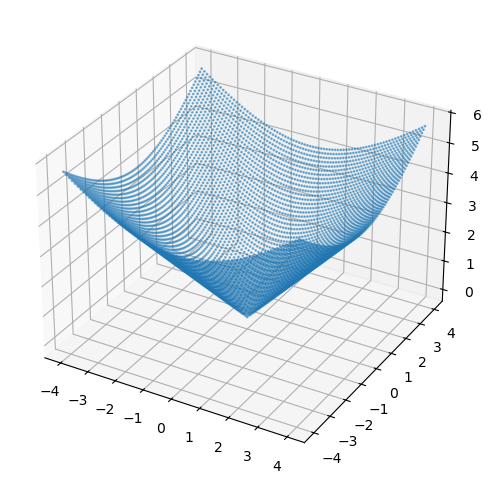

In [18]:
R = np.arange(-4,4+1e-9,0.1) # 为了确保 4 这个值能够被包含在生成的数列中。
X,Y = np.meshgrid(R,R)
F = (X**2+Y**2)**.5
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,F,s=1,alpha=0.5)
plt.show()

The parameter `s` and `alpha` control the size and the transparency of each data point. Other 3d plotting variants exist (e.g. surface plots), however, the scatter plot is the simplest approach at least conceptually. Having introduced how to easily plot 3D functions in Python, we can now analyze two-dimensional probability distributions with this same tool.

## Exercise 1: Gaussian distributions (5+5+5 P)

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution with mean vector $\mu = (0,0)$, and covariance matrix $\Sigma = I$ also known as standard normal distribution. We consider the same discretization as above (i.e. a grid from -4 to 4 using step size 0.1). For two-dimensional input spaces, the standard normal distribution is given by:
$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$
This distribution sums to $1$ when integrated over $\mathbb{R}^2$. However, it does not sum to $1$ when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)}
$$
where the sum runs over the whole discretized space.

* **Compute the distribution $P(x,y)$, and plot it.**
* **Compute the conditional distribution $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, and plot it.**
* **Marginalize the conditioned distribution $Q(x,y)$ over $y$, and plot the resulting distribution $Q(x)$.**

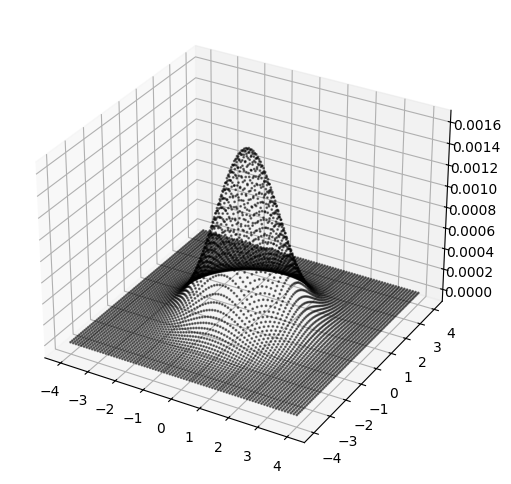

In [7]:
### REPLACE BY YOUR CODE
import solutions
solutions.s1a()
###

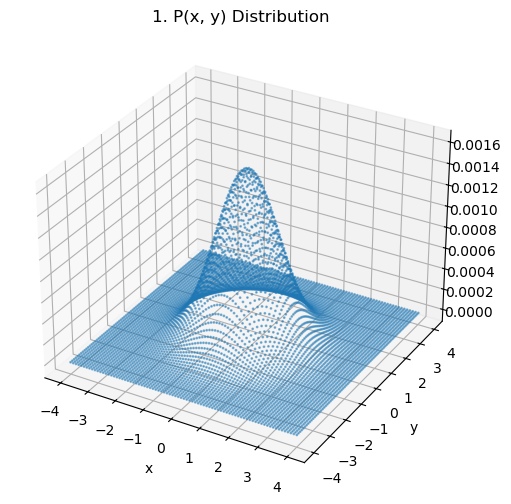

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 建立网格
step_size = 0.1
x_vals = np.arange(-4, 4 + step_size, step_size)
y_vals = np.arange(-4, 4 + step_size, step_size)
X, Y = np.meshgrid(x_vals, y_vals)

# 计算半径平方 R_sq
R_sq = X**2 + Y**2

# 计算非归一化概率 A(x, y)
A = np.exp(-0.5 * R_sq)

# 计算归一化常数 Z
Z = np.sum(A)

# --- 任务一：计算 P(x, y) 并绘图 ---
P_xy = A / Z

# 绘图 P(x, y)
plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P_xy,s=1,alpha=0.5)

plt.title('1. P(x, y) Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

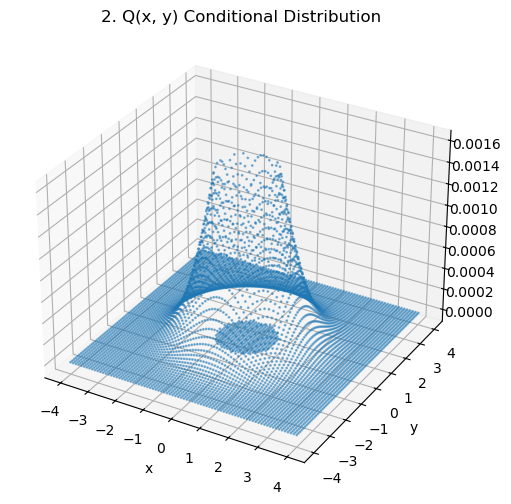

In [64]:

# --- 任务二：计算 Q(x, y) 并绘图 ---
# 定义条件 C: x^2 + y^2 >= 1
condition_C = R_sq >= 1

# 提取满足条件的概率
P_xy_C = P_xy * condition_C

# 计算条件 P(C)
P_C = np.sum(P_xy_C)

# 计算条件分布 Q(x, y) = P(x, y | C)
Q_xy = np.zeros_like(P_xy)
# 只有满足条件的区域才有非零概率
Q_xy[condition_C] = P_xy[condition_C] / P_C

# 绘图 Q(x, y)
plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Q_xy,s=1,alpha=0.5)

plt.title('2. Q(x, y) Conditional Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

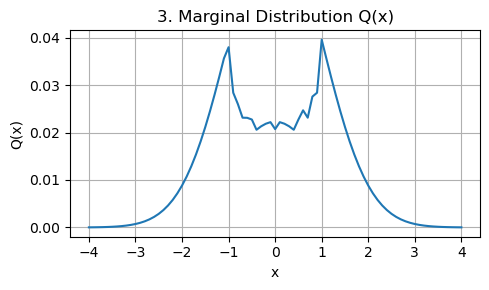

In [68]:
# --- 任务三：边缘化 Q(x, y) 得到 Q(x) 并绘图 ---
# 边缘化：沿着 y 轴求和 (默认是轴 0 或 1，取决于 meshgrid 的习惯，这里我们以 X 为 x 轴，Y 为 y 轴，
# 且 meshgrid 的习惯是 Y 随行变化，X 随列变化，因此我们需要沿着轴 0 (y 轴)求和)
Q_x = np.sum(Q_xy, axis=0)

# 绘图 Q(x)
plt.figure(figsize=(5, 3))
plt.plot(x_vals, Q_x)
plt.title('3. Marginal Distribution Q(x)')
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 验证 Q(x) 是否归一化
# print(f"P(x,y)的总和 (应接近1): {np.sum(P_xy)}")
# print(f"Q(x,y)的总和 (应接近1): {np.sum(Q_xy)}")
# print(f"Q(x)的总和 (应接近1): {np.sum(Q_x)}")

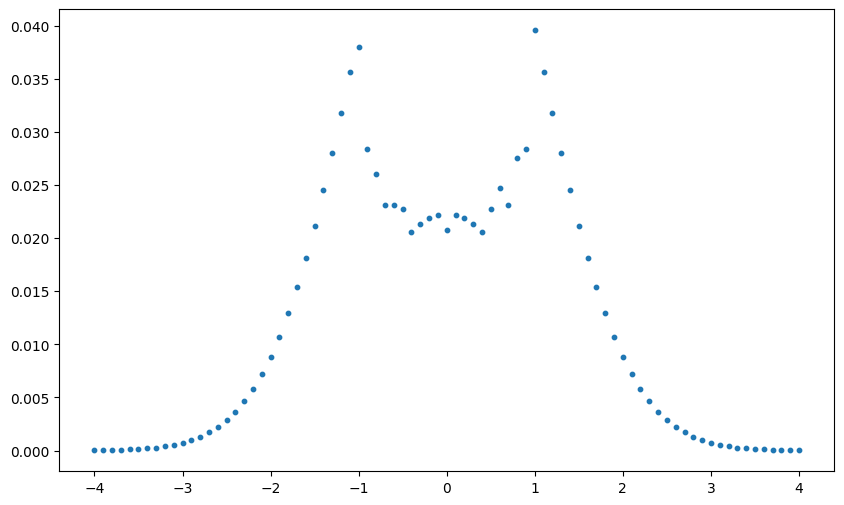

In [9]:
### REPLACE BY YOUR CODE
import solutions
solutions.s1c()
###

## Exercise 2: Bayesian Classification (5+5+5 P)

Let the two coordinates x and y be now representated as a two-dimensional vector $\boldsymbol{x}$. We consider two classes $\omega_1$ and $\omega_2$ with data-generating Gaussian distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ of mean vectors
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{and} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectively, and same covariance matrix
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that in such scenario, the optimal decision boundary between the two classes should be linear. We would like to verify this computationally by applying Bayes decision theory on grid-like discretized distributions.

* ** Using the same grid as in Exercise 1, discretize the two data-generating distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ (i.e. create discrete distributions $P(\boldsymbol{x}|\omega_1)$ and $P(\boldsymbol{x}|\omega_2)$ on the grid), and plot them with different colors.**
* **From these distributions, compute the total probability distribution $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P(\omega_c)$, and plot it.**
* **Compute and plot the class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$, and print the Bayes error rate for the discretized case.**

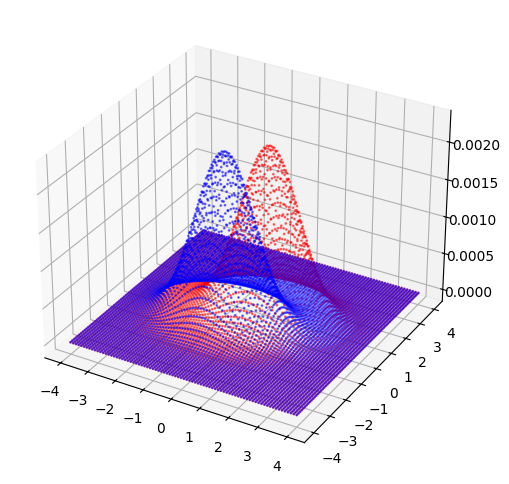

In [10]:
### REPLACE BY YOUR CODE
import solutions
solutions.s2a()
###

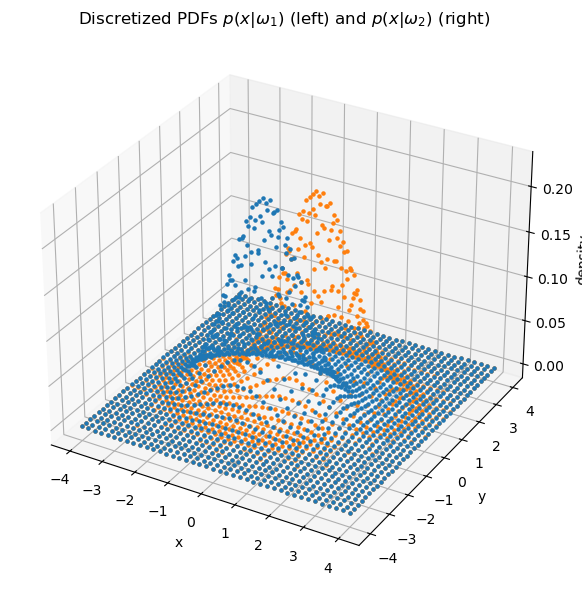

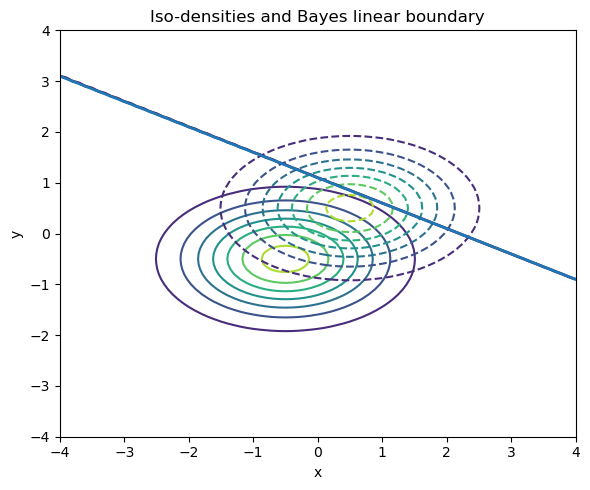

In [42]:
# ---------------------------------------------
# Two 2D Gaussians + Bayes boundary (linear)
# ---------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots

# ----- Problem setup -----
mu1 = np.array([-0.5, -0.5])
mu2 = np.array([ 0.5,  0.5])
Sigma = np.array([[1.0, 0.0],
                  [0.0, 0.5]])      # shared covariance
P1, P2 = 0.9, 0.1                   # class priors

# ----- Grid (discretization) -----
xs = np.arange(-4, 4 + 1e-9, 0.1)
ys = np.arange(-4, 4 + 1e-9, 0.1)
X, Y = np.meshgrid(xs, ys)
grid = np.stack([X.ravel(), Y.ravel()], axis=1)  # shape (N, 2)

# ----- Multivariate normal pdf -----
def mvn_pdf(x, mu, Sigma):
    """
    x: (N, d) points
    mu: (d,)
    Sigma: (d, d), positive definite
    returns: (N,) pdf values
    """
    d = mu.shape[0]
    invS = np.linalg.inv(Sigma)
    detS = np.linalg.det(Sigma)
    xc = x - mu
    expo = -0.5 * np.sum((xc @ invS) * xc, axis=1)
    coef = 1.0 / np.sqrt((2*np.pi)**d * detS)
    return coef * np.exp(expo)

p_x_w1 = mvn_pdf(grid, mu1, Sigma)
p_x_w2 = mvn_pdf(grid, mu2, Sigma)

Z1 = p_x_w1.reshape(X.shape)
Z2 = p_x_w2.reshape(X.shape)

# ----- Bayes boundary (where posteriors tie) -----
# Equivalent contour: Z1 * P1 - Z2 * P2 = 0
tie = (Z1 * P1) - (Z2 * P2)

# Also compute the **analytic** linear discriminant line:
# w^T x + w0 = 0 with
#   w = Σ^{-1}(μ2 - μ1)
#   w0 = -0.5(μ2^T Σ^{-1} μ2 - μ1^T Σ^{-1} μ1) + ln(P2/P1)
invS = np.linalg.inv(Sigma)
w = invS @ (mu2 - mu1)
w0 = -0.5 * (mu2 @ invS @ mu2 - mu1 @ invS @ mu1) + np.log(P2 / P1)

# Make a function for the line y = a x + b:
# Solve w1*x + w2*y + w0 = 0  =>  y = -(w1/w2) x - (w0/w2)
a = -(w[0] / w[1])
b = -(w0   / w[1])

# ----- 3D scatter (discretized PDFs) -----
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

step = 2  # subsample to keep it light
ax.scatter(X[::step, ::step], Y[::step, ::step], Z1[::step, ::step], s=5, depthshade=False, label=r'$p(x|\omega_1)$')
ax.scatter(X[::step, ::step], Y[::step, ::step], Z2[::step, ::step], s=5, depthshade=False, label=r'$p(x|\omega_2)$')

ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('density')
ax.set_title(r'Discretized PDFs $p(x|\omega_1)$ (left) and $p(x|\omega_2)$ (right)')
plt.tight_layout()
plt.show()

# ----- 2D contours + Bayes boundary -----
plt.figure(figsize=(6, 5))
c1 = plt.contour(X, Y, Z1, levels=8)
c2 = plt.contour(X, Y, Z2, levels=8, linestyles='dashed')
# Bayes boundary as contour where tie == 0
plt.contour(X, Y, tie, levels=[0], linewidths=2)

# Also draw the analytic straight line for reference
xx = np.linspace(xs.min(), xs.max(), 400)
yy = a*xx + b
plt.plot(xx, yy, linewidth=2)

plt.xlabel('x'); plt.ylabel('y')
plt.title('Iso-densities and Bayes linear boundary')
plt.tight_layout()
plt.show()


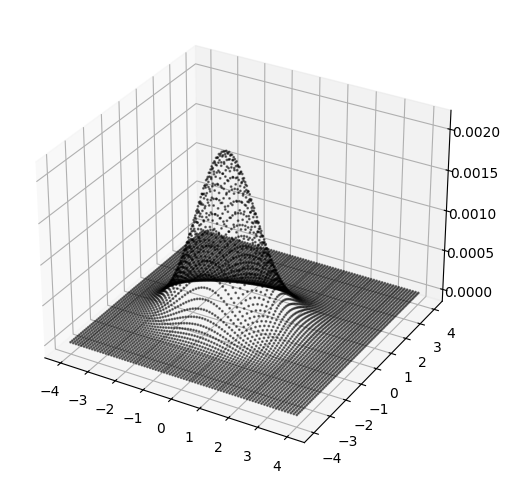

In [11]:
### REPLACE BY YOUR CODE
import solutions
solutions.s2b()
###

Bayes error rate: 0.080


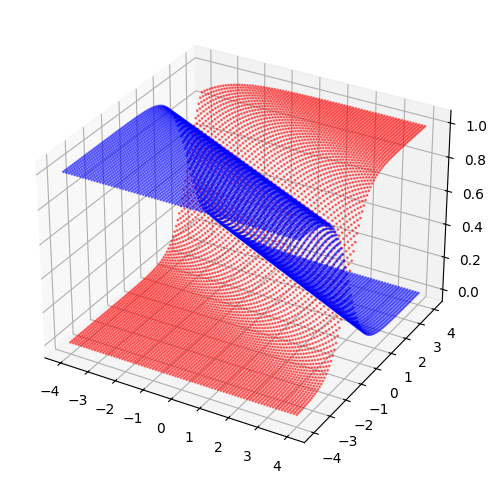

In [12]:
### REPLACE BY YOUR CODE
import solutions
solutions.s2c()
###

## Exercise 3: Reducing the Variance (5+5 P)

Suppose that the data generating distribution for the second class changes to produce samples much closer to the mean. This variance reduction for the second class is implemented by keeping the first covariance the same (i.e. $\Sigma_1 = \Sigma$) and dividing the second covariance matrix by 4 (i.e. $\Sigma_2 = \Sigma/4$). For this new set of parameters, we can perform the same analysis as in Exercise 2.

* **Plot the new class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$ associated to the new covariance matrices, and print the new Bayes error rate.**

Bayes error rate: 0.073


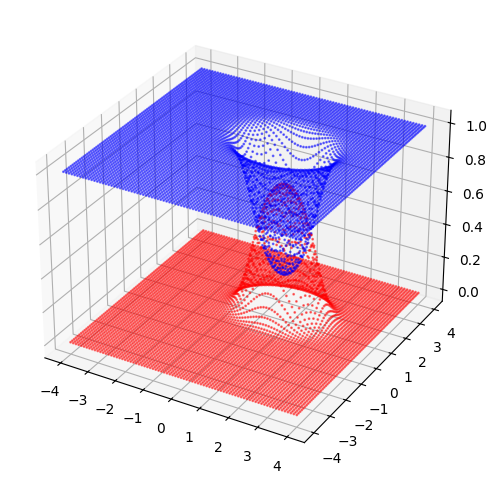

In [13]:
### REPLACE BY YOUR CODE
import solutions
solutions.s3a()
###

Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a smaller region of the input space, it should be easier to predict class 2 with certainty at this location. Paradoxally, in this new "dense" setting, we observe that class 2 does not reach full certainty anywhere in the input space, whereas it did in the previous exercise.

* **Explain this paradox.**

In [14]:
import solutions
solutions.s3b()

# Self Study

## 小知识点

In [80]:
m = np.array([1,2,3,4])
n = np.array([66,88,99])
print(m)
print(n)
mesh_x, mesh_y = np.meshgrid(m,n)
print(mesh_x.flatten())
print(mesh_y.flatten())
p = list(zip(m,n))
print(p)
print(type(p))
print(list(zip(mesh_x.flatten(),mesh_y.flatten())))
print(type(mesh_x))

[1 2 3 4]
[66 88 99]
[1 2 3 4 1 2 3 4 1 2 3 4]
[66 66 66 66 88 88 88 88 99 99 99 99]
[(1, 66), (2, 88), (3, 99)]
<class 'list'>
[(1, 66), (2, 66), (3, 66), (4, 66), (1, 88), (2, 88), (3, 88), (4, 88), (1, 99), (2, 99), (3, 99), (4, 99)]
<class 'numpy.ndarray'>


In [82]:
v = 1+1e-4
print(v)

1.0001


In [86]:
r = np.arange(1,2+1e-4,0.1)
print(r)
print(r.shape)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
(11,)


In [87]:
c = np.arange(1,2,0.1,dtype=float)
print(c)
print(c.shape)

c = np.arange(1,2+1e-9,0.1,dtype=float)
print(c)
print(c.shape)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
(10,)
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
(11,)


In [89]:
z = np.array([1,2,3,4])
z_square = z ** 2
print(z_square)
for i in z:
    print(i)

[ 1  4  9 16]
1
2
3
4


In [91]:
# f(x,y) = sqrt(x^2 + y^2)
m = np.array([1,2,3,4])
n = np.array([0.1,0.2,0.3,0.4])
print(m+n)
result = (m**2 + n**2)** 0.2
print(result)

[1.1 2.2 3.3 4.4]
[1.00199205 1.32213643 1.55493692 1.74456948]


In [92]:
a = np.arange(1,3,0.5)
print(a)
A,B = np.meshgrid(a,a)
print(A)
A_square = A **2
print(A_square)

[1.  1.5 2.  2.5]
[[1.  1.5 2.  2.5]
 [1.  1.5 2.  2.5]
 [1.  1.5 2.  2.5]
 [1.  1.5 2.  2.5]]
[[1.   2.25 4.   6.25]
 [1.   2.25 4.   6.25]
 [1.   2.25 4.   6.25]
 [1.   2.25 4.   6.25]]


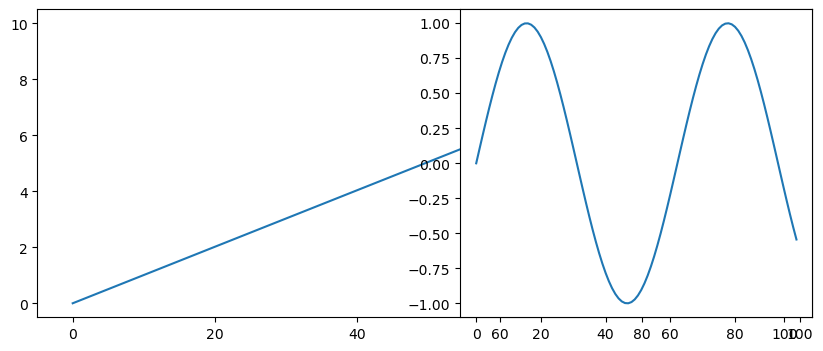

In [40]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111) # (1行, 1列, 第1个图)
ax2 = fig.add_subplot(122)
x = np.linspace(0, 10, 100)
ax.plot(x)
y = np.sin(x)
ax2.plot(y)
plt.show()


fig.add_subplot(nrows=2, ncols=2, index)

1。  2。

3。  4。

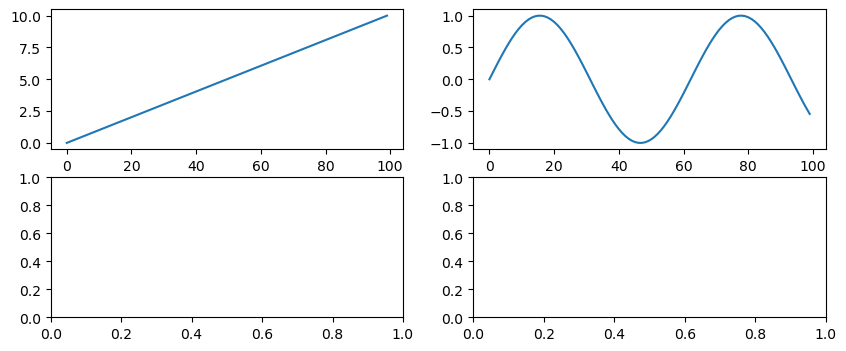

In [48]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(2,2,1) # (1行, 1列, 第1个图)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.linspace(0, 10, 100)
ax.plot(x)
y = np.sin(x)
ax2.plot(y)
plt.show()

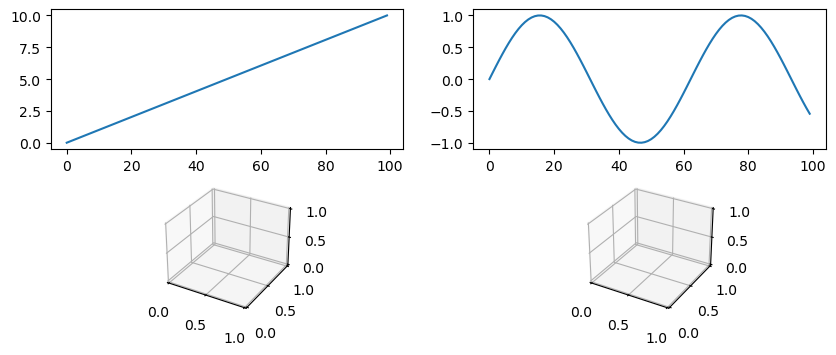

In [51]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(2,2,1) # (1行, 1列, 第1个图)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
x = np.linspace(0, 10, 100)
ax.plot(x)
y = np.sin(x)
ax2.plot(y)
plt.show()

fig.add_subplot(nrows=2, ncols=1, index)

1。 

2。 
ax = fig.add_subplot(2,2,1) # (1行, 1列, 第1个图)

ax2 = fig.add_subplot(2,2,2)

ax3 = fig.add_subplot(2, 1, 2, projection='3d')

将一个 3D 图放在其他两个 2D 图的下方，从而形成一个 上窄下宽 的布局：

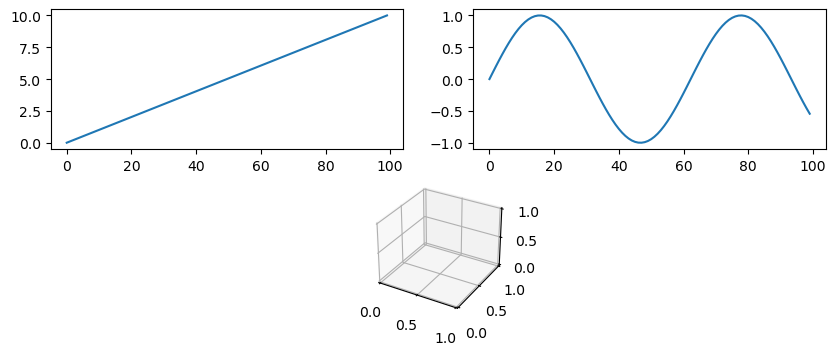

In [52]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(2,2,1) # (1行, 1列, 第1个图)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2, 1, 2, projection='3d')
x = np.linspace(0, 10, 100)
ax.plot(x)
y = np.sin(x)
ax2.plot(y)
plt.show()

In [20]:
a = np.array([1,2,3,4])
b = a >= 3
print(b)
print(a*b)

[False False  True  True]
[0 0 3 4]


In [64]:
a = np.arange(1,2,0.4)
print(a)
print()
x,y = np.meshgrid(a,a)
print('x:\n', x)
print('y:\n', y)
print()

xravel = x.ravel()
print('x.ravel: ',x.ravel(),'\n','y.ravel: ',y.ravel())
print([x.ravel(),y.ravel()])
print('stacked x ravel and y ravel without specifying axis:\n',np.stack([x.ravel(),y.ravel()]))
print()
grid = np.stack([x.ravel(),y.ravel()],axis=1)
print('stacked x ravel and y ravel, axis=1:\n',np.stack([x.ravel(),y.ravel()],axis=1))
print('stacked x ravel and y ravel, axis=0:\n', np.stack([x.ravel(),y.ravel()],axis=0))

[1.  1.4 1.8]

x:
 [[1.  1.4 1.8]
 [1.  1.4 1.8]
 [1.  1.4 1.8]]
y:
 [[1.  1.  1. ]
 [1.4 1.4 1.4]
 [1.8 1.8 1.8]]

x.ravel:  [1.  1.4 1.8 1.  1.4 1.8 1.  1.4 1.8] 
 y.ravel:  [1.  1.  1.  1.4 1.4 1.4 1.8 1.8 1.8]
[array([1. , 1.4, 1.8, 1. , 1.4, 1.8, 1. , 1.4, 1.8]), array([1. , 1. , 1. , 1.4, 1.4, 1.4, 1.8, 1.8, 1.8])]
stacked x ravel and y ravel without specifying axis:
 [[1.  1.4 1.8 1.  1.4 1.8 1.  1.4 1.8]
 [1.  1.  1.  1.4 1.4 1.4 1.8 1.8 1.8]]

stacked x ravel and y ravel, axis=1:
 [[1.  1. ]
 [1.4 1. ]
 [1.8 1. ]
 [1.  1.4]
 [1.4 1.4]
 [1.8 1.4]
 [1.  1.8]
 [1.4 1.8]
 [1.8 1.8]]
stacked x ravel and y ravel, axis=0:
 [[1.  1.4 1.8 1.  1.4 1.8 1.  1.4 1.8]
 [1.  1.  1.  1.4 1.4 1.4 1.8 1.8 1.8]]


## 高斯分布

exercise 1

$\mu = (0,0)$, and covariance matrix $\Sigma = I$ 

$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$

This distribution sums to $1$ when integrated over $\mathbb{R}^2$

We consider the same discretization as above (i.e. a grid from -4 to 4 using step size 0.1).

$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)}
$$


对网格上的所有 (x,y) 点同时计算函数值，是因为这是计算机对连续函数进行离散化和可视化的唯一有效方式。

1. 计算机处理连续函数的基本方式：离散化

连续函数： 像您例子中的高斯概率密度函数 P(x,y)，它在 x−y 平面上的每一个点都有一个值。

计算机的限制： 计算机不能存储一个无限连续函数的所有值。它必须将函数离散化，即将感兴趣的连续区域（如 [−4,4] 乘 [−4,4]）分割成一个有限的、间隔均匀的点的集合——即网格。

计算目标： 为了了解和显示这个函数在整个区域的行为，我们必须计算函数在每个网格点上的值。如果遗漏了任何点，图像就会出现“洞”或失真。


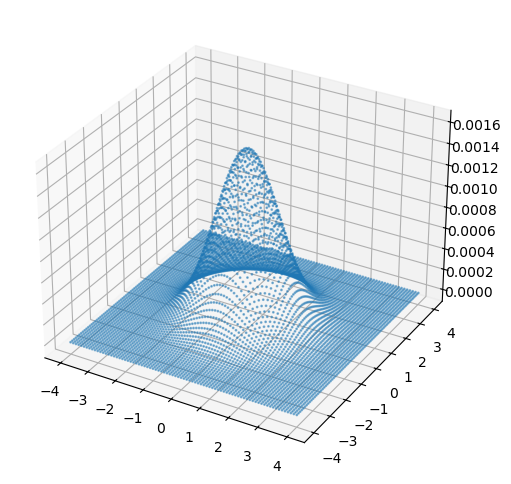

In [12]:
# how to compute the distribution P(x,y) and plot it
# why the solution use np.arange(-4,4+1e-4,0.1) as x, y
# create a grid from -4 to 4 using step size 0.1
G = np.arange(-4,4+1e-4,0.1)
X,Y = np.meshgrid(G,G)

# x^2 + y^2
square = X**2 + Y**2
# e^(-0.5 * (x^2 + y^2)) = e^(-0.5*squre)
e_half_squre = np.exp(-0.5*square)
# Z = sum(e^(-0.5 * (x^2 + y^2))) = sum(e_half_squre)
Z = np.sum(e_half_squre)
# P(x,y) = (1/Z ) * e^(-0.5 * (x^2 + y^2)) 
# = (1/Z)*e_half_squre = e_half_squre / Z
P_xy = e_half_squre / Z
# plot the distribution P(x,y)
plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P_xy,s=1,alpha=0.5)
plt.show()


In [24]:
a = np.array([1,2,3,4])
b = a >= 3
c = a*b
print(b)
print(c)
print(np.sum(c))

[False False  True  True]
[0 0 3 4]
7


In [25]:
import numpy as np

# 原始数组，形状为 (2, 3)
original_array = np.array([[10, 20, 30], 
                           [40, 50, 60]], dtype=np.float64)

# 使用 np.zeros_like 创建一个新数组
new_array = np.zeros_like(original_array)

print("原始数组形状:", original_array.shape)
print("原始数组类型:", original_array.dtype)
print("\n新数组 new_array:")
print(new_array)
print("新数组形状:", new_array.shape)
print("新数组类型:", new_array.dtype)

原始数组形状: (2, 3)
原始数组类型: float64

新数组 new_array:
[[0. 0. 0.]
 [0. 0. 0.]]
新数组形状: (2, 3)
新数组类型: float64


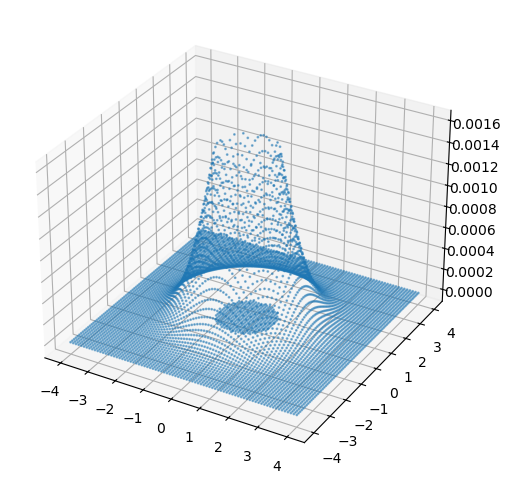

In [31]:
# task: compute the conditional distribution Q(x,y)

# how to seletc points which suits the condition x^2 + y^2 > 1
condition_true = square > 1. # it's an array of True, False
Q = P_xy * condition_true # the points suiting condtion bleibt unverändert, sonst 0
P = np.sum(Q)

Q_xy = np.zeros_like(P_xy)
Q_xy[condition_true] = P_xy[condition_true] / P

plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Q_xy,s=1,alpha=0.5)

plt.show()

In [ ]:
#axis=0: 代表行维度（垂直方向）。
# 沿着 axis=0 求和，就是把每一列的元素加起来。

# axis=1: 代表列维度（水平方向）。
# 沿着 axis=1 求和，就是把每一行的元素加起来。

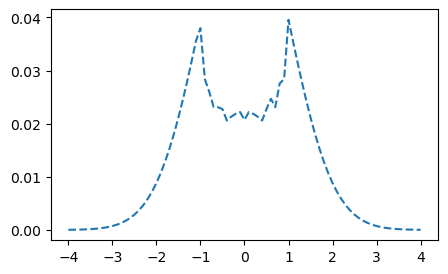

In [39]:
# Task: marginalize the conditioned distribution over y and 
# plot the resulting distribution
# 因为数据是离散的，所以这样算。如果是连续的，计算略有不同

Q_x = np.sum(Q_xy, axis=0)
# 绘图 Q(x)
plt.figure(figsize=(5, 3))
plt.plot(G, Q_x,linestyle='--')
plt.show()

## 贝叶斯分类

In [ ]:
G = np.arange(-4,4+1e-5,0.1)
X,Y = np.meshgrid(G,G)

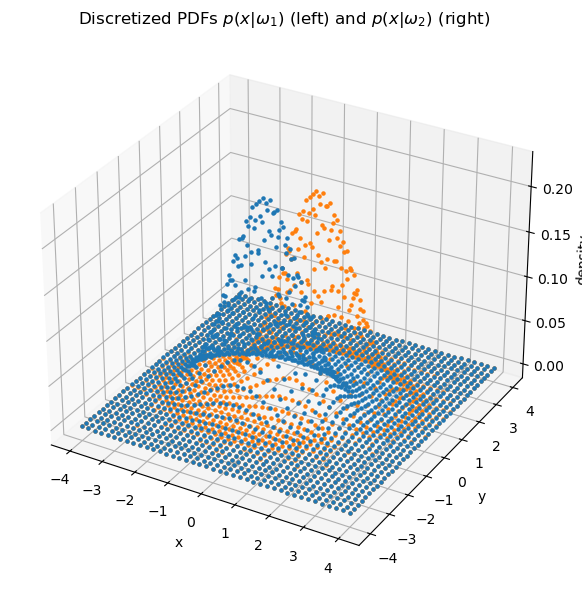

In [65]:

# ----- Problem setup -----
mu1 = np.array([-0.5, -0.5])
mu2 = np.array([ 0.5,  0.5])
Sigma = np.array([[1.0, 0.0],
                  [0.0, 0.5]])      # shared covariance
P1, P2 = 0.9, 0.1                   # class priors

# ----- Grid (discretization) -----
xs = np.arange(-4, 4 + 1e-9, 0.1)
ys = np.arange(-4, 4 + 1e-9, 0.1)
X, Y = np.meshgrid(xs, ys)
grid = np.stack([X.ravel(), Y.ravel()], axis=1)  # shape (N, 2)

# ----- Multivariate normal pdf -----
def mvn_pdf(x, mu, Sigma):
    """
    x: (N, d) points
    mu: (d,)
    Sigma: (d, d), positive definite
    returns: (N,) pdf values
    """
    d = mu.shape[0]
    invS = np.linalg.inv(Sigma)
    detS = np.linalg.det(Sigma)
    xc = x - mu
    expo = -0.5 * np.sum((xc @ invS) * xc, axis=1)
    coef = 1.0 / np.sqrt((2*np.pi)**d * detS)
    return coef * np.exp(expo)

p_x_w1 = mvn_pdf(grid, mu1, Sigma)
p_x_w2 = mvn_pdf(grid, mu2, Sigma)

Z1 = p_x_w1.reshape(X.shape)
Z2 = p_x_w2.reshape(X.shape)

# ----- Bayes boundary (where posteriors tie) -----
# Equivalent contour: Z1 * P1 - Z2 * P2 = 0
tie = (Z1 * P1) - (Z2 * P2)

# ----- 3D scatter (discretized PDFs) -----
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

step = 2  # subsample to keep it light
ax.scatter(X[::step, ::step], Y[::step, ::step], Z1[::step, ::step], s=5, depthshade=False, label=r'$p(x|\omega_1)$')
ax.scatter(X[::step, ::step], Y[::step, ::step], Z2[::step, ::step], s=5, depthshade=False, label=r'$p(x|\omega_2)$')

ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('density')
ax.set_title(r'Discretized PDFs $p(x|\omega_1)$ (left) and $p(x|\omega_2)$ (right)')
plt.tight_layout()
plt.show()

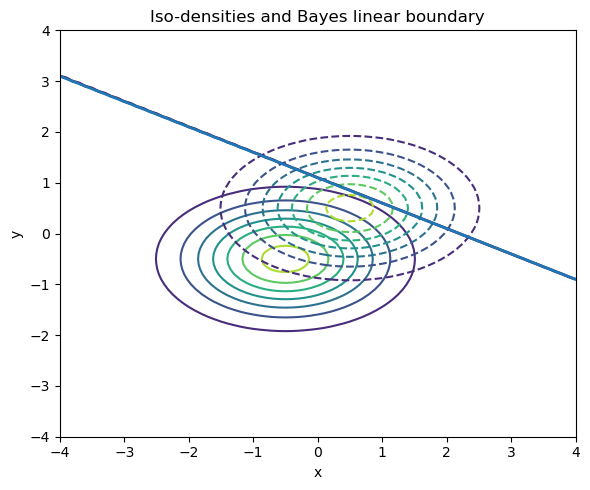

In [66]:
# Also compute the **analytic** linear discriminant line:
# w^T x + w0 = 0 with
#   w = Σ^{-1}(μ2 - μ1)
#   w0 = -0.5(μ2^T Σ^{-1} μ2 - μ1^T Σ^{-1} μ1) + ln(P2/P1)
invS = np.linalg.inv(Sigma)
w = invS @ (mu2 - mu1)
w0 = -0.5 * (mu2 @ invS @ mu2 - mu1 @ invS @ mu1) + np.log(P2 / P1)

# Make a function for the line y = a x + b:
# Solve w1*x + w2*y + w0 = 0  =>  y = -(w1/w2) x - (w0/w2)
a = -(w[0] / w[1])
b = -(w0   / w[1])

# ----- 2D contours + Bayes boundary -----
plt.figure(figsize=(6, 5))
c1 = plt.contour(X, Y, Z1, levels=8)
c2 = plt.contour(X, Y, Z2, levels=8, linestyles='dashed')
# Bayes boundary as contour where tie == 0
plt.contour(X, Y, tie, levels=[0], linewidths=2)

# Also draw the analytic straight line for reference
xx = np.linspace(xs.min(), xs.max(), 400)
yy = a*xx + b
plt.plot(xx, yy, linewidth=2)

plt.xlabel('x'); plt.ylabel('y')
plt.title('Iso-densities and Bayes linear boundary')
plt.tight_layout()
plt.show()

## 降低Variance